<a href="https://colab.research.google.com/github/Jiasha-nath/Temp-Press-Altitude-Predictor-/blob/main/bmp_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

load dataset

In [ ]:
data = pd.read_csv("bmp-dataset.csv")

split data into feaures and target variables

In [ ]:
X = data[['Altitude']]  # Features
y_temp = data['Temperature']  # Target variable
y_pressure = data['Pressure']  # Target variable

split data into training and testing sets

In [ ]:
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X, y_temp, test_size=0.2, random_state=42)
X_train_pressure, X_test_pressure, y_train_pressure, y_test_pressure = train_test_split(X, y_pressure, test_size=0.2, random_state=42)

train linear regression model

In [ ]:
model_temp_lr = LinearRegression()
model_temp_lr.fit(X_train_temp, y_train_temp)

model_pressure_lr = LinearRegression()
model_pressure_lr.fit(X_train_pressure, y_train_pressure)

LinearRegression()

train random forest model

In [ ]:
model_temp_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_temp_rf.fit(X_train_temp, y_train_temp)

model_pressure_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_pressure_rf.fit(X_train_pressure, y_train_pressure)

RandomForestRegressor(random_state=42)

fuction to calculate error percentage

In [ ]:
def calculate_error_percentage(true_values, predicted_values):
    return (np.abs(true_values - predicted_values) / true_values) * 100

Function to calculate R-squared

In [ ]:
def calculate_r_squared(true_values, predicted_values):
    return r2_score(true_values, predicted_values)

Input 5 altitude values for prediction

In [ ]:
new_altitudes = []
for i in range(5):
    altitude = float(input(f"Enter altitude {i+1}: "))
    new_altitudes.append(altitude)

Enter altitude 1: 132
Enter altitude 2: 130
Enter altitude 3: 140
Enter altitude 4: 141
Enter altitude 5: 145


Example prediction with linear regression and rand forest

In [ ]:
for altitude in new_altitudes:

    # Example prediction with linear regression
    predicted_temp_lr = model_temp_lr.predict(np.array([[altitude]]))
    predicted_pressure_lr = model_pressure_lr.predict(np.array([[altitude]]))

    print("Linear Regression - Predicted Temperature at", altitude, "m:", predicted_temp_lr[0])
    print("Linear Regression - Predicted Pressure at", altitude, "m:", predicted_pressure_lr[0])

     # Example prediction with random forest
    predicted_temp_rf = model_temp_rf.predict(np.array([[altitude]]))
    predicted_pressure_rf = model_pressure_rf.predict(np.array([[altitude]]))

    print("Random Forest - Predicted Temperature at", altitude, "m:", predicted_temp_rf[0])
    print("Random Forest - Predicted Pressure at", altitude, "m:", predicted_pressure_rf[0])

Linear Regression - Predicted Temperature at 132.0 m: 33.009402751193285
Linear Regression - Predicted Pressure at 132.0 m: 997.4953276367355
Random Forest - Predicted Temperature at 132.0 m: 36.19799999999996
Random Forest - Predicted Pressure at 132.0 m: 996.9290999999979
Linear Regression - Predicted Temperature at 130.0 m: 32.56788599639404
Linear Regression - Predicted Pressure at 130.0 m: 997.732297822292
Random Forest - Predicted Temperature at 130.0 m: 36.19799999999996
Random Forest - Predicted Pressure at 130.0 m: 996.9290999999979
Linear Regression - Predicted Temperature at 140.0 m: 34.77546977039026
Linear Regression - Predicted Pressure at 140.0 m: 996.5474468945092
Random Forest - Predicted Temperature at 140.0 m: 34.12769999999994
Random Forest - Predicted Pressure at 140.0 m: 996.5902999999978
Linear Regression - Predicted Temperature at 141.0 m: 34.99622814778988
Linear Regression - Predicted Pressure at 141.0 m: 996.4289618017309
Random Forest - Predicted Temperature

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid

 Example prediction with random forest


predict for LR



In [ ]:
y_pred_temp_lr = model_temp_lr.predict(np.array(new_altitudes).reshape(-1, 1))
y_pred_pressure_lr = model_pressure_lr.predict(np.array(new_altitudes).reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


predict for RF

In [ ]:
y_pred_temp_rf = model_temp_rf.predict(np.array(new_altitudes).reshape(-1, 1))
y_pred_pressure_rf = model_pressure_rf.predict(np.array(new_altitudes).reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
print(y_test_temp.shape)

(200,)


In [ ]:
print(y_test_pressure.shape)

(200,)


Calculate error percentage for linear regression

In [ ]:
error_percentage_temp_lr = calculate_error_percentage(y_temp, model_temp_lr.predict(X))
mean_error_percentage_temp_lr = np.mean(error_percentage_temp_lr)
error_percentage_pressure_lr = calculate_error_percentage(y_pressure, model_pressure_lr.predict(X))
mean_error_percentage_pressure_lr = np.mean(error_percentage_pressure_lr)

Calculate error percentage for random forest

In [ ]:
error_percentage_temp_rf = calculate_error_percentage(y_temp, model_temp_rf.predict(X))
mean_error_percentage_temp_rf = np.mean(error_percentage_temp_rf)
error_percentage_pressure_rf = calculate_error_percentage(y_pressure, model_pressure_rf.predict(X))
mean_error_percentage_pressure_rf = np.mean(error_percentage_pressure_rf)

Calculate R-squared for linear regression

In [ ]:
r2_temp_lr = calculate_r_squared(y_temp, model_temp_lr.predict(X))
r2_pressure_lr = calculate_r_squared(y_pressure, model_pressure_lr.predict(X))

Calculate R-squared for random forest

In [ ]:
r2_temp_rf = calculate_r_squared(y_temp, model_temp_rf.predict(X))
r2_pressure_rf = calculate_r_squared(y_pressure, model_pressure_rf.predict(X))

In [ ]:
print("\nLinear Regression:")
print("R-squared (Temperature):", r2_temp_lr)
print("Mean Error Percentage (Temperature):", mean_error_percentage_temp_lr)
print("R-squared (Pressure):", r2_pressure_lr)
print("Mean Error Percentage (Pressure):", mean_error_percentage_pressure_lr)


Linear Regression:
R-squared (Temperature): 0.28156467529546225
Mean Error Percentage (Temperature): 3.4144046397754573
R-squared (Pressure): 0.9999485024705338
Mean Error Percentage (Pressure): 0.00025567943297140507


In [ ]:
print("\nRandom Forest:")
print("R-squared (Temperature):", r2_temp_rf)
print("Mean Error Percentage (Temperature):", mean_error_percentage_temp_rf)
print("R-squared (Pressure):", r2_pressure_rf)
print("Mean Error Percentage (Pressure):", mean_error_percentage_pressure_rf)


Random Forest:
R-squared (Temperature): 0.8748853950882163
Mean Error Percentage (Temperature): 0.703734906487645
R-squared (Pressure): 0.9999748128044511
Mean Error Percentage (Pressure): 7.703739873151329e-05


Predictions for new altitudes

In [ ]:
new_altitudes = np.linspace(130, 150, 1000).reshape(-1, 1)  # Generate altitudes from 0 to 10000
y_pred_temp_lr = model_temp_lr.predict(new_altitudes)
y_pred_pressure_lr = model_pressure_lr.predict(new_altitudes)
y_pred_temp_rf = model_temp_rf.predict(new_altitudes)
y_pred_pressure_rf = model_pressure_rf.predict(new_altitudes)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


plotting

In [ ]:
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

LR results

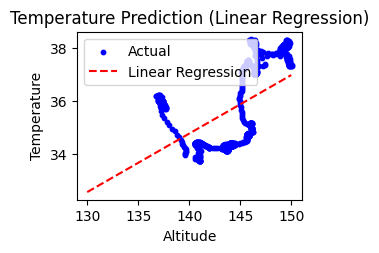

In [ ]:
plt.subplot(2, 2, 1)
plt.scatter(X, y_temp, color='blue', label='Actual', s=10)
plt.plot(new_altitudes, y_pred_temp_lr, 'r--', label='Linear Regression')
plt.title('Temperature Prediction (Linear Regression)')
plt.xlabel('Altitude')
plt.ylabel('Temperature')
plt.legend()


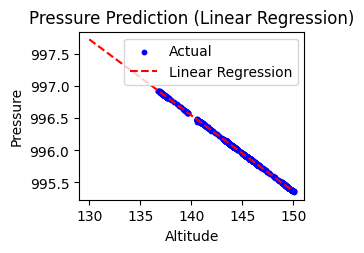

In [ ]:
plt.subplot(2, 2, 2)
plt.scatter(X, y_pressure, color='blue', label='Actual', s=10)
plt.plot(new_altitudes, y_pred_pressure_lr, 'r--', label='Linear Regression')
plt.title('Pressure Prediction (Linear Regression)')
plt.xlabel('Altitude')
plt.ylabel('Pressure')
plt.legend()

RF results

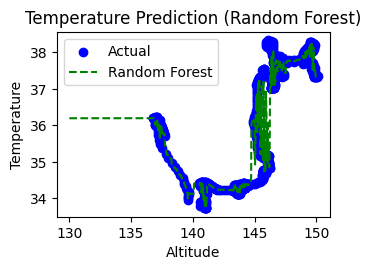

In [ ]:
plt.subplot(2, 2, 3)
plt.scatter(X, y_temp, color='blue', label='Actual')
plt.plot(new_altitudes, y_pred_temp_rf, 'g--', label='Random Forest')
plt.title('Temperature Prediction (Random Forest)')
plt.xlabel('Altitude')
plt.ylabel('Temperature')
plt.legend()

plt.tight_layout()
plt.show()

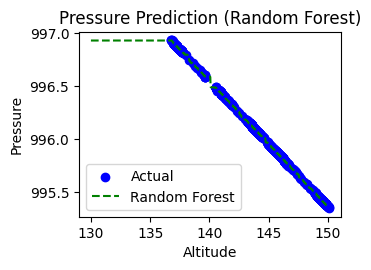

In [ ]:
plt.subplot(2, 2, 4)
plt.scatter(X, y_pressure, color='blue', label='Actual')
plt.plot(new_altitudes, y_pred_pressure_rf, 'g--', label='Random Forest')
plt.title('Pressure Prediction (Random Forest)')
plt.xlabel('Altitude')
plt.ylabel('Pressure')
plt.legend()
plt.tight_layout()
plt.show()